# Classifying Heart Disease in Patients using Multivariate 
#### Research question: Which physiological risk factors are most suitable for accurately classifying heart disease among patients?

## Introduction

(Ada)
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question 

This dataset includes the many factors considered to diagnose heart disease in a patient. The attributes we will consider include age, sex, and rest BP (resting blood pressure in mm Hg on admission to the hospital). We will use these attributes to train the program to be able to predict the presence of heart disease in new patients. The presence will be on a level of 0 to 4, with 0 being no presence. 

## Preliminary exploratory data analysis

(Nicholas, David)
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)
set.seed(100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
## Loading the Data
heart_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_cols <- c("age", "sex", "chest_pain_type", "rest_bp", "cholesterol", "fast_blood_sugar", "rest_ecg", "max_hr", "ex_angina", "st_depr", "slope_peak", "major_vessel_num", "thal", "pres_val")
heart_data <- read_csv(heart_data_url, col_names = heart_cols) |>
    mutate(sex = as.factor(sex),
          chest_pain_type = as.factor(chest_pain_type),
          fast_blood_sugar = as.factor(fast_blood_sugar),
          rest_ecg = as.factor(rest_ecg),
          ex_angina = as.factor(ex_angina),
          major_vessel_num = as.factor(major_vessel_num),
          thal = as.factor(as.integer(thal)),
          pres_val = as.factor(pres_val),
          presence = as.factor(ifelse(pres_val == 0, "no", "yes")))
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): major_vessel_num, thal
dbl (12): age, sex, chest_pain_type, rest_bp, cholesterol, fast_blood_sugar,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in is.factor(x):
“NAs introduced by coercion”


age,sex,chest_pain_type,rest_bp,cholesterol,fast_blood_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope_peak,major_vessel_num,thal,pres_val,presence
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6,0,no
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3,2,yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7,1,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7,3,yes
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3,1,yes
38,1,3,138,175,0,0,173,0,0.0,1,?,3,0,no


In [3]:
## Scaling the data
heart_data_recipe <- recipe(presence ~ age + rest_bp + cholesterol + max_hr + st_depr, data = heart_data) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_data_scaled <- heart_data_recipe |>
    prep() |>
    bake(heart_data)
heart_data_scaled

age,rest_bp,cholesterol,max_hr,st_depr,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9471596,0.7562740,-0.2644628,0.01716893,1.0855423,no
1.3897030,1.6085589,0.7591593,-1.81889638,0.3965257,yes
1.3897030,-0.6642009,-0.3417173,-0.90086373,1.3439235,yes
⋮,⋮,⋮,⋮,⋮,⋮
0.2833446,-0.09601098,-2.2344526,-1.512885,0.1381444,yes
0.2833446,-0.09601098,-0.2065219,1.066349,-0.8953805,yes
-1.8187363,0.35854099,-1.3846531,1.022633,-0.8953805,no


In [4]:
## Splitting the data into training/testing set
heart_split <- heart_data_scaled |>
    select(age, rest_bp, cholesterol, max_hr, st_depr, presence) |>
    initial_split(prop = 0.75, strata = presence)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

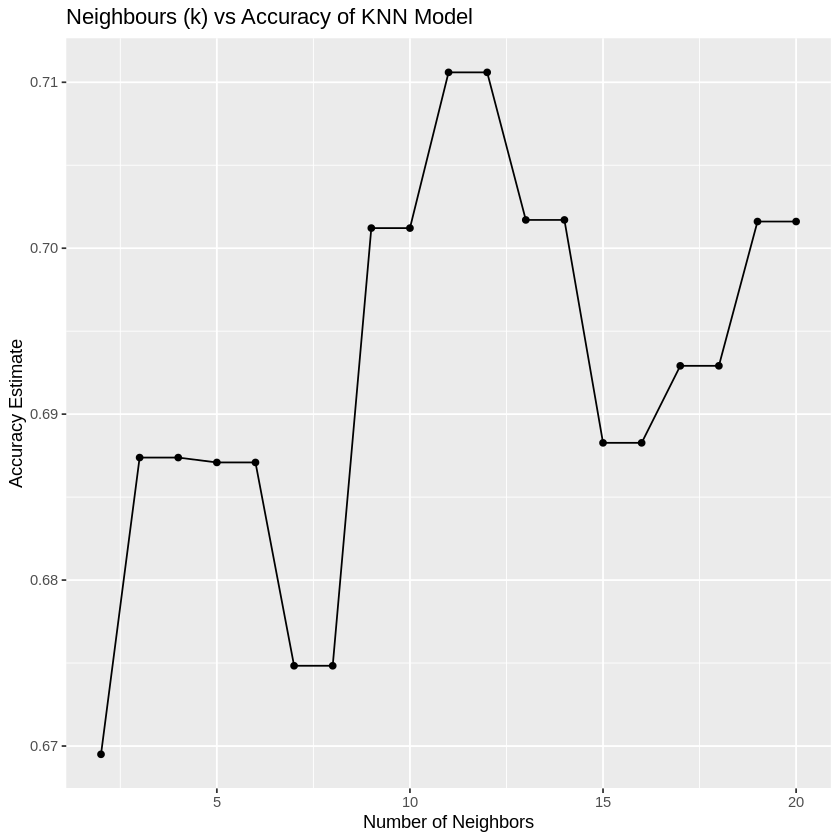

In [5]:
## Finding the optimal k
knn_recipe <- recipe(presence ~ age + rest_bp + cholesterol + max_hr + st_depr, data = heart_train)

heart_train <- knn_recipe |>
    prep() |>
    bake(heart_train)

knn_vfold <- vfold_cv(heart_train, v = 5, strata = presence)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k <- tibble(neighbors = seq(2, 20, 1))

knn_results <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = knn_vfold, grid = k) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    ggtitle("Neighbours (k) vs Accuracy of KNN Model") +
    labs(x = "Number of Neighbors", y = "Accuracy Estimate")

cross_val_plot

In [6]:
## Testing the model
knn_spec <- nearest_neighbor(weight = "rectangular", neighbor = 12) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = heart_train)

knn_predictions <- predict(knn_fit, heart_test) |>
    bind_cols(heart_test)

knn_metrics <- knn_predictions |>
    metrics(truth = presence, estimate = .pred_class)

knn_conf_mat <- knn_predictions |>
    conf_mat(truth = presence, estimate = .pred_class)

knn_conf_mat

          Truth
Prediction no yes
       no  32  17
       yes  9  18

In [ ]:
## Data visualization


## Methods

(Ada, Kiara)
For our data analysis, we will use tidymodel’s K-nearest neighbours to classify a new patient as either having heart disease or not. The data set has designated numbers 0 to 4 to represent the various classes of the heart disease diagnosis, with 0 indicating no heart disease and 4 indicating heart disease. A value of 0 suggests the absence of significant heart disease while a value of 1 suggests the presence of heart disease.

We plan on following the main data analysis workflow steps when designing a K-nearest neighbours model to ensure efficiency and clarity. After tidying the data, filtering out the unneeded columns, and scaling and centering the data, we will split the data into a training set and a testing set and use the training set for cross validation. After analyzing the accuracies of various K values using a graph, we will choose the most reliable K value for our K-nearest neighbours model specification, recipe, and workflow.

The raw data contains thirteen columns that have the potential to act as predictors for the diagnosis of heart disease. In our data analysis, we will only use five of these: resting blood pressure in mm Hg (trestbps), serum cholesterol in mg/dl (chol), the number of cigarettes smoked per day (cigs), family history of coronary artery disease (famhist), and whether or not the patient’s fasting blood sugar is greater than 120 mg/dl (fbs).

We will visualize the accuracy of each K value by creating a line plot depicting each K value and their respective accuracy. The plot of accuracy vs. number of neighbours will be used to choose the best K value. Additionally, we will visualize the final results by graphing all of the testing data on a scatter plot with each point coloured based on their predicted classification using our best classification model (one colour corresponds to each number from 0 to 4).

## Expected outcomes and significance

(Sethu)
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?